In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_dots = 200

X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)  # -2pi 到 +2pi 之间生成200一维数组 
Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1  # 加入随机噪点
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)  # 将数组形状重新定义为（200，1）
print(np.shape(X),np.shape(Y))

(200, 1) (200, 1)


#### 使用sklearn.preprocessing.PolynomialFeatures来进行特征的构造

它是使用多项式的方法来进行的，如果有a，b两个特征，那么它的2次多项式为（1,a,b,a^2,ab, b^2）。

* degree：控制多项式的度

* interaction_only： 默认为False，如果指定为True，那么就不会有特征自己和自己结合的项，上面的二次项中没有a^2和b^2。

* include_bias：默认为True。如果为True的话，那么就会有上面的 1那一项。

#### sklearn.pipeline.Pipeline
分类数据填充、数值数据填充、无序分类数据变成dummpy类型，有序分类数据变成label类型，数值类型切分。要将这些动作结合在一起，应该怎么做？

将这些动作都定义为一个含有fit和transform的类，然后使用Pipeline集成起来，因为Pipeline需要fit和transform方法。

基本思想都是这样的，构造函数继承TransformerMixin 构造函数传入列名还有一些参数。transform方法返回一个改造后的新的DataFrame。

In [3]:
from sklearn.linear_model import LinearRegression   # LinearRegression 线性回归
from sklearn.preprocessing import PolynomialFeatures  # 使用PolynomialFeatures 和 Pipeline 创建一个多项式拟合模型
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)  #  polynomial多项式   include_bias=False 不包括偏置x0
    linear_regression = LinearRegression(normalize=True)  # normalize=True 对数据进行归一化
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline
polynomial_model(degree=1)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])

In [9]:
from sklearn.metrics import mean_squared_error  # mean_squared_error 计算均方根误差

degrees = [ 3, 5, 10, 20]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X, Y)
    train_score = model.score(X, Y)
    mse = mean_squared_error(Y, model.predict(X))
    results.append({"model": model, "degree": d, "score": train_score, "mse": mse})
# print(results)
for r in results:
    print("degree: {}; train score: {}; mean squared error: {}".format(r["degree"], r["score"], r["mse"]))
    print(np.shape((r["model"].predict(X))))

degree: 3; train score: 0.27950315607489706; mean squared error: 0.3573444142593321
(200, 1)
degree: 5; train score: 0.897171270866708; mean squared error: 0.0509999069267089
(200, 1)
degree: 10; train score: 0.9936045661416834; mean squared error: 0.0031719397320108668
(200, 1)
degree: 20; train score: 0.9939150808240418; mean squared error: 0.0030179339397275427
(200, 1)


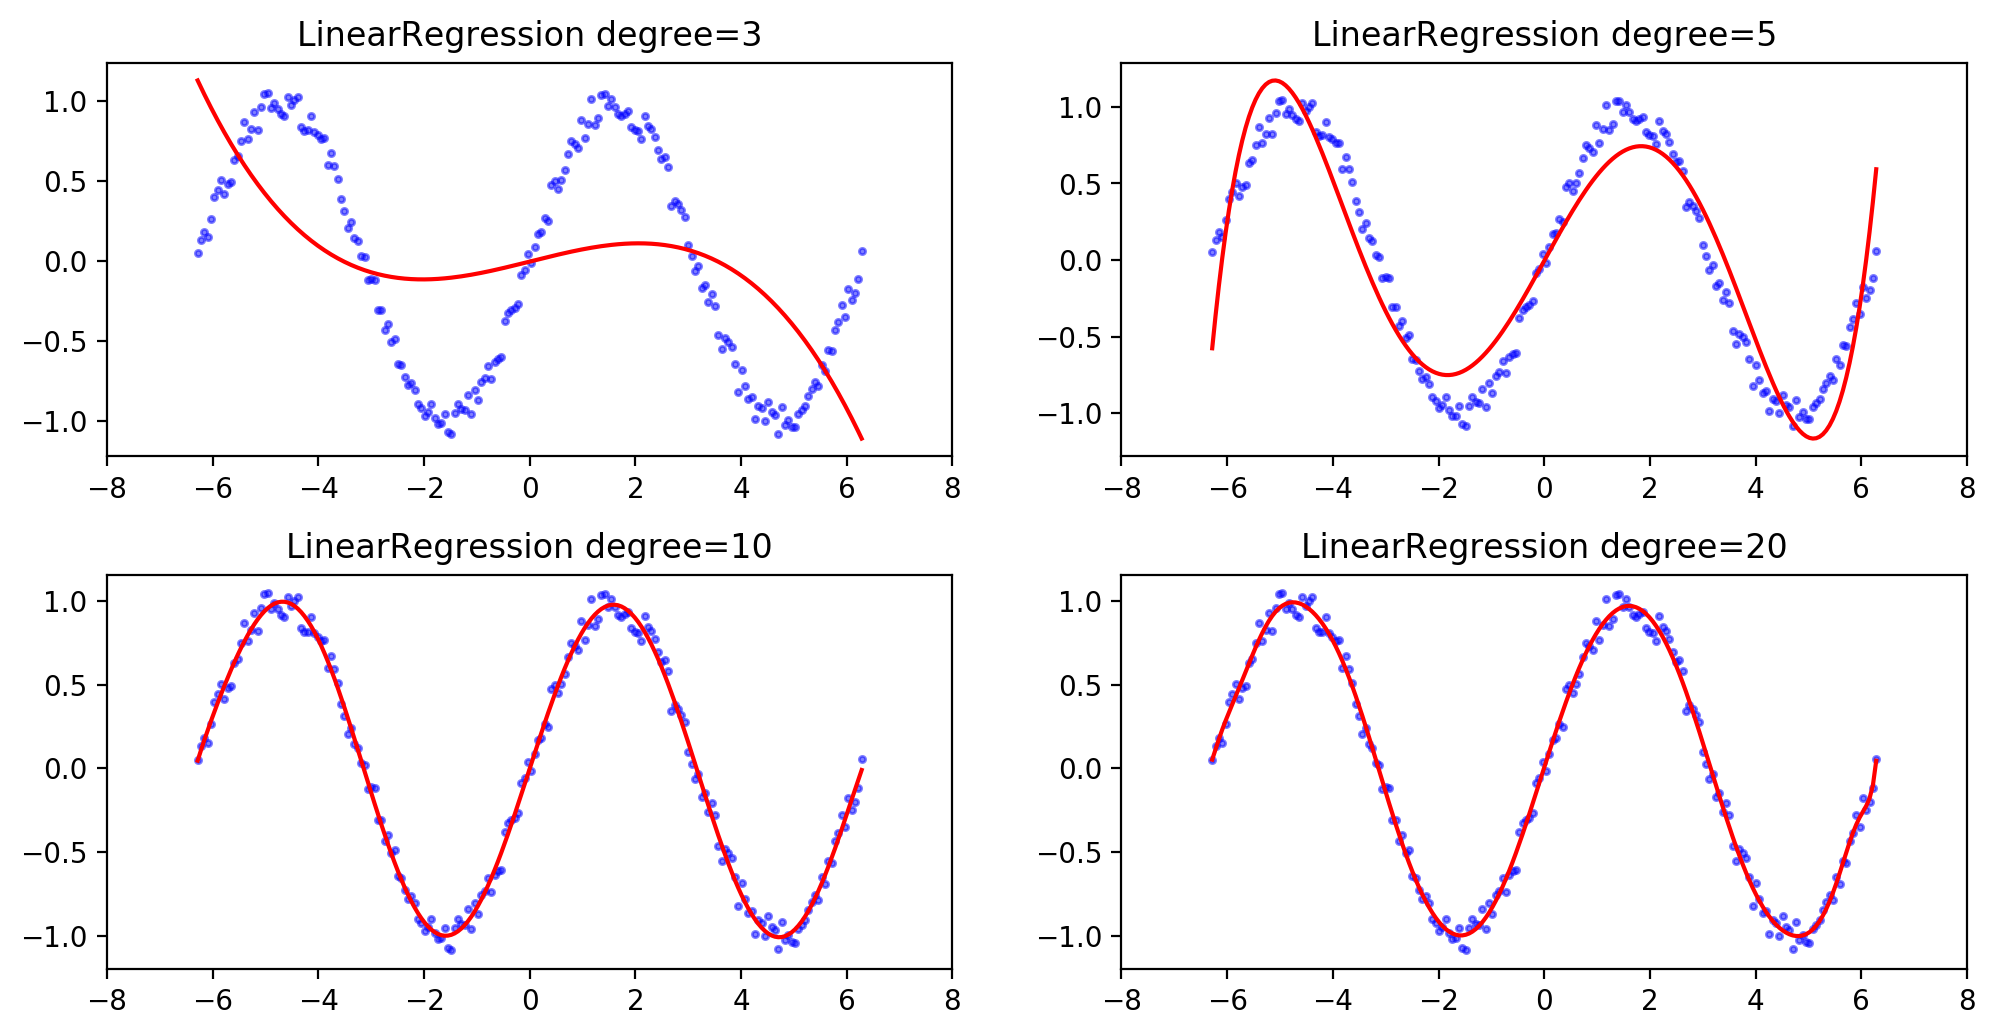

In [10]:
from matplotlib.figure import SubplotParams

plt.figure(figsize=(12, 6), dpi=200, subplotpars=SubplotParams(hspace=0.3))
for i, r in enumerate(results):  # enumerate列举、枚举、计算
    fig = plt.subplot(2, 2, i+1)
    plt.xlim(-8, 8)
    plt.title("LinearRegression degree={}".format(r["degree"]))
    plt.scatter(X, Y, s=5, c='b', alpha=0.5)
    plt.plot(X, r["model"].predict(X), 'r-')